<h1> Heart Disease UCI</h1> 
<br>
<h3> Context</h3> 
<br>  
<p style="font-size:16px">Based on information about heart disease I will use ML Decision Trees and Random Forest to predict, what the chances are of developing an illness. General description and data are available on Kaggle: <a href>https://www.kaggle.com/ronitf/heart-disease-uci</a> 
<br>
<h3>Attribute Information:</h3>
age<br>
sex (1=male, 0=female)<br>
chest pain type (4 values)<br>
resting blood pressure<br>
serum cholestoral in mg/dl<br>
fasting blood sugar > 120 mg/dl<br>
resting electrocardiographic results (values 0,1,2)<br>
maximum heart rate achieved<br>
exercise induced angina<br>
oldpeak = ST depression induced by exercise relative to rest<br>
the slope of the peak exercise ST segment<br>
number of major vessels (0-3) colored by flourosopy<br>
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics # for confusion matrix

from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydot 
from six import StringIO

In [2]:
data = pd.read_csv("heart.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<h3>Exploratory data analysis</h3>

<p style="font-size:18px">Table has 303 entries, no missing data and datatypes are also suitable for work</p>

Text(0.5, 1.0, 'Heart disease by age')

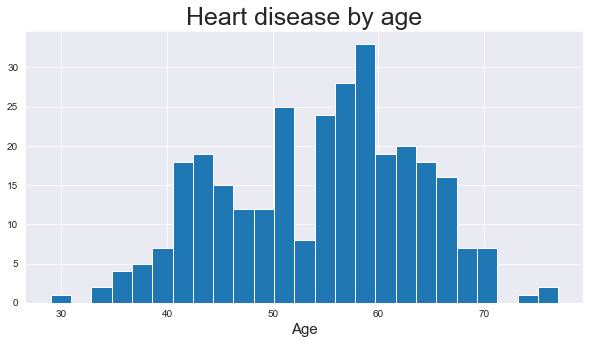

In [5]:
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
data['age'].hist(bins=25, figsize = (10, 5)) 
plt.xlabel('Age', fontsize=15)
plt.title("Heart disease by age",fontsize=25)

<p style="font-size:18px">By the age of 40, cases of heart disease increase. Heart disease is particularly common in the age group between 40 and 50 and between mid-50 and around 68 years of age.</p>

Text(0.5, 1.0, 'Heart disease by age')

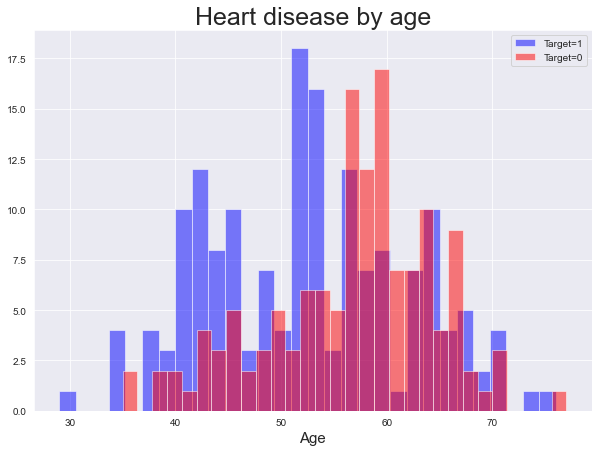

In [6]:
plt.figure(figsize=(10,7))
data[data["target"]==1]["age"].hist(alpha=0.5,color="blue",
                                              bins=30,label="Target=1")
data[data["target"]==0]["age"].hist(alpha=0.5,color="red",
                                              bins=30,label="Target=0")
plt.legend()
plt.xlabel("Age", fontsize=15)
plt.title("Heart disease by age",fontsize=25)

<p style="font-size:18px">The graph clearly shows that heart disease is increasing significantly in middle age. On the other hand, at the age of 60 there are more cases where people show fewer signs of heart disease.</p>

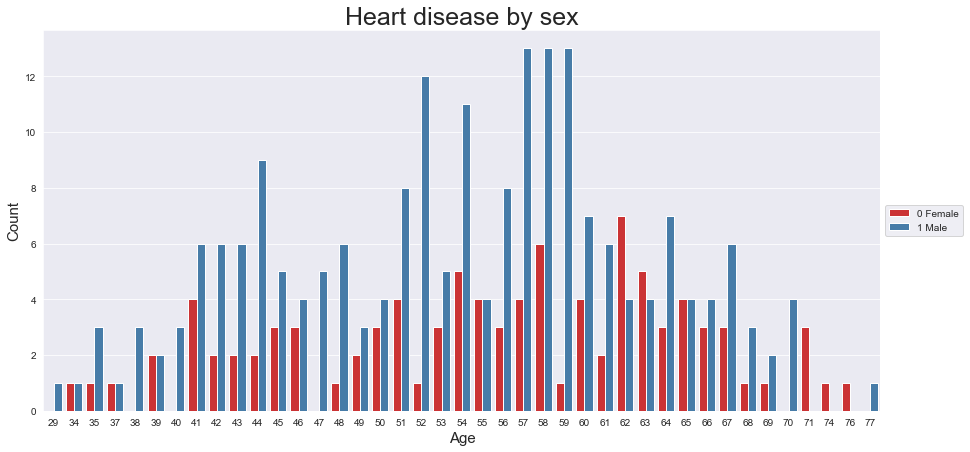

In [7]:
plt.figure(figsize=(15,7))
sns.countplot(x='age',hue='sex',data=data,palette='Set1')
plt.title("Heart disease by sex",fontsize=25)
plt.xlabel("Age", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.legend(['0 Female', '1 Male'],loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

<p style="font-size:18px">The data shows heart problems for males twice as often as for females. We can see the numbers below.</p>

In [8]:
data[data["sex"]==1].count()

age         207
sex         207
cp          207
trestbps    207
chol        207
fbs         207
restecg     207
thalach     207
exang       207
oldpeak     207
slope       207
ca          207
thal        207
target      207
dtype: int64

In [9]:
data[data["sex"]==0].count()

age         96
sex         96
cp          96
trestbps    96
chol        96
fbs         96
restecg     96
thalach     96
exang       96
oldpeak     96
slope       96
ca          96
thal        96
target      96
dtype: int64

<h3>Split Data into train and test data.</h3>

In [10]:
X = data.drop(["target"], axis=1)
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)

<h3>Decision Trees algorithm</h3>

In [11]:
dtree = DecisionTreeClassifier()

In [12]:
dtree.fit(X_train, y_train)  # train Data

DecisionTreeClassifier()

In [13]:
predictions = dtree.predict(X_test) # Prediction

In [14]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70        39
           1       0.77      0.79      0.78        52

    accuracy                           0.75        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.75      0.75      0.75        91



<p style="font-size:18px">The model shows a precision of 77% for 1 and 71% for 0 (disease or not). 79% and 69% of the data were identified in the test file. Error1-score amounts to 78% and 70%.</p> 

In [15]:
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[27, 12],
       [11, 41]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

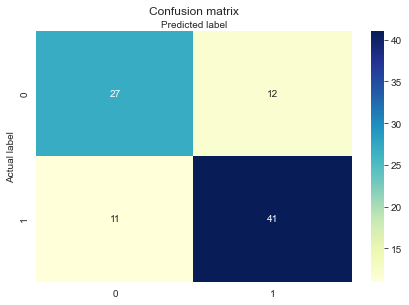

In [16]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<p style="font-size:18px">Confusion Matrix shows positiv results 27 and 41. Error type 1 is 11, error type 2 is 12.</p> 

<h3>Random Forest algorithm</h3>

In [17]:
rfc = RandomForestClassifier()

In [18]:
rfc.fit(X_train, y_train) # train data

RandomForestClassifier()

In [19]:
rfc_predict = rfc.predict(X_test) # predictions

In [20]:
print(classification_report(y_test, rfc_predict))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80        39
           1       0.87      0.79      0.83        52

    accuracy                           0.81        91
   macro avg       0.81      0.82      0.81        91
weighted avg       0.82      0.81      0.81        91



<p style="font-size:18px">The model shows a precision of 87% for 1 and 75% fo 0 (disease or not). 79% and 85% of the data were identified in the test file. Error1-score amounts to 83% and 80%.</p> 

In [21]:
cnf_matrix = metrics.confusion_matrix(y_test, rfc_predict)
cnf_matrix

array([[33,  6],
       [11, 41]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

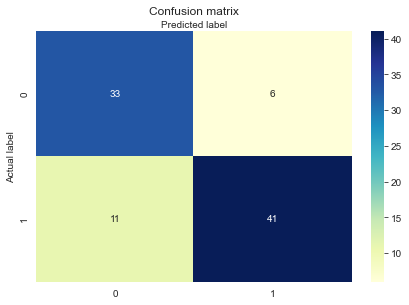

In [22]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<p style="font-size:18px">Confusion Matrix shows higher results than before: 33 and 41. Error type 1 is 11, error type 2 is 6.</p> 

<h3>Conclusion: </h3>
<p style="font-size:18px">the random forest algorithm shows better results.</p>